In [1]:
import skimage
import skimage.io as sio
from skimage.color import rgb2gray
from skimage.measure import regionprops_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold
from skimage.morphology import remove_small_objects
from skimage.measure import label
from scipy.ndimage.morphology import binary_fill_holes

In [38]:
def img_score(filepath, man_img, man_count):
    imagefile = sio.imread(filepath)
    imgman = sio.imread(man_img)
    img = rgb2gray(imagefile)
    # 8 threshold
    # original = img
    li = skimage.filters.threshold_li(img)
    minimum = skimage.filters.threshold_minimum(img)
    triangle = skimage.filters.threshold_triangle(img)
    isodata = skimage.filters.threshold_isodata(img)
    mean = skimage.filters.threshold_mean(img)
    otsu = skimage.filters.threshold_otsu(img)
    yen = skimage.filters.threshold_yen(img)
    # while loop for 7 methods
    # img_list = []
    threshold = [li, minimum, triangle, isodata, mean, otsu, yen]
    scorelist = []
    
    for i in range (0,7):  
        score =[]
        thre = threshold[i]
        binary = img > thre
        #img_list.append(binary)
        clean_img = remove_small_objects(binary)  # remove small objects
        lab_img = label(clean_img)  # label images to be seen as one or multiple object(s)
        lab_imgm = label(imgman)
        # count method
        props = regionprops(lab_img)
        x = np.zeros(len(props))
        y = np.zeros(len(props))
        area = np.zeros(len(props))
        perim = np.zeros(len(props))
        #intensity = np.zeros(len(props))
        counter = 0
        for prop in props:
            x[counter] = prop.centroid[0]
            y[counter] = prop.centroid[1]
            area[counter] = prop.area
            perim[counter] = prop.perimeter
            #intensity[counter] = prop.mean_intensity
            counter += 1
        countscore = np.abs((counter-man_count)/man_count)*100
        countmethod = ('count method', countscore)
        score.append(countmethod)
        
        # area method
        propsm = regionprops(lab_imgm)
        xm = np.zeros(len(propsm))
        ym = np.zeros(len(propsm))
        aream = np.zeros(len(propsm))
        perimm = np.zeros(len(propsm))
        counterm = 0
        for prop in propsm:
            xm[counterm] = prop.centroid[0]
            ym[counterm] = prop.centroid[1]
            aream[counterm] = prop.area
            perimm[counterm] = prop.perimeter
            counterm += 1
        countermin = min(counter, counterm)
        if countermin <= 0:
            countermin += 1
        area.sort()
        aream.sort()
        areadiff = 0 
        for i in range(0, countermin-1):
            areaper = ((area[i]-aream[i])/aream[i])*10
            areadiff += areaper
        areadiffmean = areadiff/countermin
        areamethod = ('area method', areadiffmean)
        score.append(areamethod)
        
        # overlap method
        fill = binary_fill_holes(clean_img) # filling holes of every cell
        rows, cols = fill.shape
        num = 0
        for i in range(rows):
            for j in range(cols):
                if fill[i,j] == imgman[i,j]:
                    num += 1
        overlapdiff = 100-num/(rows*cols)*100
        overlapmethod = ('overlap method', overlapdiff)
        score.append(overlapmethod)
        scorelist.append(score)
        #i += 1
    return scorelist
    


#### add two more methods

In [27]:
def img_score(filepath, man_img, man_count):
    imagefile = sio.imread(filepath)
    imgman = sio.imread(man_img)
    img = rgb2gray(imagefile)
    # 8 threshold
    # original = img
    li = skimage.filters.threshold_li(img)
    minimum = skimage.filters.threshold_minimum(img)
    triangle = skimage.filters.threshold_triangle(img)
    isodata = skimage.filters.threshold_isodata(img)
    mean = skimage.filters.threshold_mean(img)
    otsu = skimage.filters.threshold_otsu(img)
    yen = skimage.filters.threshold_yen(img)
    # while loop for 7 methods
    # img_list = []
    threshold = [li, minimum, triangle, isodata, mean, otsu, yen]
    scorelist = []
    
    for i in range (0,7):  
        score =[]
        thre = threshold[i]
        binary = img > thre
        #img_list.append(binary)
        clean_img = remove_small_objects(binary)  # remove small objects
        lab_img = label(clean_img)  # label images to be seen as one or multiple object(s)
        lab_imgm = label(imgman)
        # count method
        props = regionprops(lab_img)
        x = np.zeros(len(props))
        y = np.zeros(len(props))
        area = np.zeros(len(props))
        perim = np.zeros(len(props))
        #intensity = np.zeros(len(props))
        counter = 0
        for prop in props:
            x[counter] = prop.centroid[0]
            y[counter] = prop.centroid[1]
            area[counter] = prop.area
            perim[counter] = prop.perimeter
            #intensity[counter] = prop.mean_intensity
            counter += 1
        #regionprops = pd.DataFrame({'X': x, 'Y': y, 'Area': area,'Perim': perim})
        table = regionprops_table(lab_img, properties=('perimeter', 'area', 'major_axis_length', 'minor_axis_length'))
        features = pd.DataFrame(table)
        features['circularity'] = 4*np.pi*features.area/features.perimeter**2
        features['aspect_ratio'] = features.major_axis_length/features.minor_axis_length
        features = features.dropna()
        cirmean = features['circularity'].mean()
        ratiomean = features['aspect_ratio'].mean()
        
        countscore = np.abs((counter-man_count)/man_count)*100
        countmethod = ('count method', countscore)
        score.append(countmethod)
       
    
        # area method
        propsm = regionprops(lab_imgm)
        xm = np.zeros(len(propsm))
        ym = np.zeros(len(propsm))
        aream = np.zeros(len(propsm))
        perimm = np.zeros(len(propsm))
        counterm = 0
        for prop in propsm:
            xm[counterm] = prop.centroid[0]
            ym[counterm] = prop.centroid[1]
            aream[counterm] = prop.area
            perimm[counterm] = prop.perimeter
            counterm += 1
        #regionpropsm = pd.DataFrame({'X': xm, 'Y': ym, 'Area': aream,'Perim': perimm})
        
        tablem = regionprops_table(lab_imgm, properties=('perimeter', 'area', 'major_axis_length', 'minor_axis_length'))
        featuresm = pd.DataFrame(tablem)
        featuresm['circularity'] = 4*np.pi*featuresm.area/featuresm.perimeter**2
        featuresm['aspect_ratio'] = featuresm.major_axis_length/featuresm.minor_axis_length
        featuresm = featuresm.dropna()
        cirmeanm = featuresm['circularity'].mean()
        ratiomeanm = featuresm['aspect_ratio'].mean()
        
        countermin = min(counter, counterm)
        if countermin <= 0:
            countermin += 1
        area.sort()
        aream.sort()
        areadiff = 0 
        for i in range(0, countermin-1):
            areaper = ((area[i]-aream[i])/aream[i])*10
            areadiff += areaper
        areadiffmean = areadiff/countermin
        areamethod = ('area method', areadiffmean)
        score.append(areamethod)
        
        # overlap method
        fill = binary_fill_holes(clean_img) # filling holes of every cell
        rows, cols = fill.shape
        num = 0
        for i in range(rows):
            for j in range(cols):
                if fill[i,j] == imgman[i,j]:
                    num += 1
        overlapdiff = 100-num/(rows*cols)*100
        overlapmethod = ('overlap method', overlapdiff)
        score.append(overlapmethod)
        scorelist.append(score)
        #i += 1
        
        #
        cirscore = ((cirmean-cirmeanm)/np.abs(cirmeanm))*100
        cirmethod = ('circularity', cirscore)
        score.append(cirmethod)
        
        ratioscore = ((ratiomean-ratiomeanm)/np.abs(ratiomeanm))*100
        ratiomethod = ('aspect_ratio', ratioscore)
        score.append(ratiomethod)
        
    #return scorelist
    return features.iloc[:,4:6],featuresm.iloc[:,4:6]
    

In [2]:
filepath = '../images/OGD-0.5h_40x_thalamus_1.tif'
man_img = '../images/edited_OGD-0.5h_40x_thalamus_1.5h_40x_thalamus_1.tif'
man_count = 133

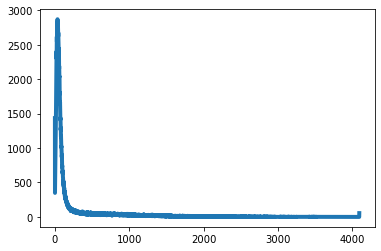

In [7]:
from skimage.exposure import histogram


imagefile = sio.imread('slice_OGD-0.5h_40x_thalamus_1.tif')
img = rgb2gray(imagefile)
    
hist, hist_centers = histogram(img)
plt.plot(hist_centers, hist, linewidth=4)

In [40]:
scores = img_score('../images/slice_OGD-0.5h_40x_thalamus_1.tif', '../images/M_OGD-0.5h_40x_thalamus_1.tif', 123)

In [45]:
scores

[[('count method', 12.195121951219512),
  ('area method', 21.068198644769314),
  ('overlap method', 18.516159057617188)],
 [('count method', 100.0),
  ('area method', 0.0),
  ('overlap method', 15.195083618164062)],
 [('count method', 13.821138211382115),
  ('area method', 22.468224148922634),
  ('overlap method', 20.816421508789062)],
 [('count method', 15.447154471544716),
  ('area method', 16.87899278811853),
  ('overlap method', 16.408157348632812)],
 [('count method', 13.821138211382115),
  ('area method', 21.949681337203415),
  ('overlap method', 20.59326171875)],
 [('count method', 15.447154471544716),
  ('area method', 16.87899278811853),
  ('overlap method', 16.408157348632812)],
 [('count method', 10.569105691056912),
  ('area method', 17.148609922271483),
  ('overlap method', 17.15087890625)]]

In [35]:
score1 = halfhour[0][0][1]
score1

12.195121951219512

In [66]:
def whichBest(scores):
    li = scores[0][0][1] + scores[0][1][1] + scores[0][2][1]
    minimum = scores[1][0][1] + scores[1][1][1] + scores[1][2][1]
    triangle = scores[2][0][1] + scores[2][1][1] + scores[2][2][1]
    isodata = scores[3][0][1] + scores[3][1][1] + scores[3][2][1]
    mean = scores[4][0][1] + scores[4][1][1] + scores[4][2][1]
    otsu = scores[5][0][1] + scores[5][1][1] + scores[5][2][1]
    yen = scores[6][0][1] + scores[6][1][1] + scores[6][2][1]
    minScore = min(li, minimum, triangle, isodata, mean, otsu, yen) 
    if minScore == li:
        print ("The recommended threshold method is Li with a score of ", minScore/3, "which means the thresholded image is ", minScore/3, "% different from the manually labelled image.")
    if minScore == minimum:
        print ("The recommended threshold method is Minimum with a score of ", minScore/3, "which means the thresholded image is ", minScore/3, "% different from the manually labelled image.")
    if minScore == triangle:
        print ("The recommended threshold method is Triangle with a score of ", minScore/3, "which means the thresholded image is ", minScore/3, "% different from the manually labelled image.")
    if minScore == isodata:
        print ("The recommended threshold method is Isodata with a score of ", minScore/3, "which means the thresholded image is ", minScore/3, "% different from the manually labelled image.")
    if minScore == mean:
        print ("The recommended threshold method is Mean with a score of ", minScore/3, "which means the thresholded image is ", minScore/3, "% different from the manually labelled image.")
    if minScore == otsu:
        print ("The recommended threshold method is Otsu with a score of ", minScore/3, "which means the thresholded image is ", minScore/3, "% different from the manually labelled image.")
    if minScore == yen:
        print ("The recommended threshold method is Yen with a score of ", minScore/3, "which means the thresholded image is ", minScore/3, "% different from the manually labelled image.")

In [67]:
whichBest(scores)

The recommended threshold method is Yen with a score of  14.956198173192798 which means the thresholded image is  14.956198173192798 % different from the manually labelled image.


In [1]:
import csv

with open('example.csv', 'w', newline='') as csvfile:
    fieldnames = ['Threshold_method', 'score_method', 'Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Threshold_method': 'Li', 'score_method': 'count method', 'Score % off': scores[0][0][1]})
    writer.writerow({'Threshold_method': 'Li', 'score_method': 'area method', 'Score % off': scores[0][1][1]})
    writer.writerow({'Threshold_method': 'Li', 'score_method': 'overlap method', 'Score % off': scores[0][2][1]})
    writer.writerow({'Threshold_method': 'Minimum', 'score_method': 'count method', 'Score % off': scores[1][0][1]})
    writer.writerow({'Threshold_method': 'Minimum', 'score_method': 'area method', 'Score % off': scores[1][1][1]})
    writer.writerow({'Threshold_method': 'Minimum', 'score_method': 'overlap method', 'Score % off': scores[1][2][1]})
    writer.writerow({'Threshold_method': 'Triangle', 'score_method': 'count method', 'Score % off': scores[2][0][1]})
    writer.writerow({'Threshold_method': 'Triangle', 'score_method': 'area method', 'Score % off': scores[2][1][1]})
    writer.writerow({'Threshold_method': 'Triangle', 'score_method': 'overlap method', 'Score % off': scores[2][2][1]})
    writer.writerow({'Threshold_method': 'isodata', 'score_method': 'count method', 'Score % off': scores[3][0][1]})
    writer.writerow({'Threshold_method': 'isodata', 'score_method': 'area method', 'Score % off': scores[3][1][1]})
    writer.writerow({'Threshold_method': 'isodata', 'score_method': 'overlap method', 'Score % off': scores[3][2][1]})
    writer.writerow({'Threshold_method': 'Mean', 'score_method': 'count method', 'Score % off': scores[4][0][1]})
    writer.writerow({'Threshold_method': 'Mean', 'score_method': 'area method', 'Score % off': scores[4][1][1]})
    writer.writerow({'Threshold_method': 'Mean', 'score_method': 'overlap method', 'Score % off': scores[4][2][1]})
    writer.writerow({'Threshold_method': 'Otsu', 'score_method': 'count method', 'Score % off': scores[5][0][1]})
    writer.writerow({'Threshold_method': 'Otsu', 'score_method': 'area method', 'Score % off': scores[5][1][1]})
    writer.writerow({'Threshold_method': 'Otsu', 'score_method': 'overlap method', 'Score % off': scores[5][2][1]})
    writer.writerow({'Threshold_method': 'Yen', 'score_method': 'count method', 'Score % off': scores[6][0][1]})
    writer.writerow({'Threshold_method': 'Yen', 'score_method': 'area method', 'Score % off': scores[6][1][1]})
    writer.writerow({'Threshold_method': 'Yen', 'score_method': 'overlap method', 'Score % off': scores[6][2][1]})
    
import pandas as pd
df = pd.read_csv('example.csv')
df

NameError: name 'scores' is not defined

In [4]:
import csv

with open('example.csv', 'w', newline='') as csvfile:
    fieldnames = ['Threshold_method', 'score_method', 'Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Threshold_method': 'Li', 'score_method': 'count method', 'Score': 1})

import pandas as pd
df = pd.read_csv('example.csv')
print (df)

  Threshold_method  score_method  Score
0               Li  count method      1


threshold method score = li, minimum, triangle, isodata, mean, otsu, yen

In [14]:
notreatment = img_score('../images/slice_Non-treated_40x_thalamus_1.tif', '../images/M_Non-treated_40x_thalamus_1.tif', 116)
halfhour = img_score('../images/slice_OGD-0.5h_40x_thalamus_1.tif', '../images/M_OGD-0.5h_40x_thalamus_1.tif', 123)
onehalf = img_score('../images/slice_OGD-1.5h_40x_thalamus_1.tif', '../images/M_OGD-1.5h_40x_thalamus_1.tif', 11)
three = img_score('../images/slice_OGD-3h_40x_thalamus_1.tif', '../images/M_OGD-3h_40x_thalamus_1.tif', 151)
SOD = img_score('../images/slice_OGD-3h+SOD_40x_thalamus_1.tif', '../images/M_OGD-3h+SOD_40x_thalamus_1.tif', 111)

NameError: name 'regionprops_table' is not defined

In [9]:
notreatment

NameError: name 'notreatment' is not defined

In [7]:
halfhour

[[('count method', 12.195121951219512),
  ('area method', 21.068198644769314),
  ('overlap method', 18.516159057617188)],
 [('count method', 100.0),
  ('area method', 0.0),
  ('overlap method', 15.195083618164062)],
 [('count method', 13.821138211382115),
  ('area method', 22.468224148922634),
  ('overlap method', 20.816421508789062)],
 [('count method', 15.447154471544716),
  ('area method', 16.87899278811853),
  ('overlap method', 16.408157348632812)],
 [('count method', 13.821138211382115),
  ('area method', 21.949681337203415),
  ('overlap method', 20.59326171875)],
 [('count method', 15.447154471544716),
  ('area method', 16.87899278811853),
  ('overlap method', 16.408157348632812)],
 [('count method', 10.569105691056912),
  ('area method', 17.148609922271483),
  ('overlap method', 17.15087890625)]]

In [8]:
onehalf

[[('count method', 0.0),
  ('area method', 72.39953605677272),
  ('overlap method', 7.2963714599609375)],
 [('count method', 100.0),
  ('area method', 0.0),
  ('overlap method', 6.097412109375)],
 [('count method', 0.0),
  ('area method', 81.53599128094655),
  ('overlap method', 8.205413818359375)],
 [('count method', 9.090909090909092),
  ('area method', 48.737060521806605),
  ('overlap method', 6.394195556640625)],
 [('count method', 18.181818181818183),
  ('area method', 54.832839604834305),
  ('overlap method', 9.248733520507812)],
 [('count method', 9.090909090909092),
  ('area method', 48.737060521806605),
  ('overlap method', 6.394195556640625)],
 [('count method', 9.090909090909092),
  ('area method', 59.30732121868522),
  ('overlap method', 7.16400146484375)]]

In [9]:
three

[[('count method', 22.516556291390728),
  ('area method', 7.685899557208841),
  ('overlap method', 40.20576477050781)],
 [('count method', 100.0),
  ('area method', 0.0),
  ('overlap method', 32.49359130859375)],
 [('count method', 100.0),
  ('area method', 0.0),
  ('overlap method', 32.49359130859375)],
 [('count method', 18.543046357615893),
  ('area method', 3.6035613656662657),
  ('overlap method', 35.749053955078125)],
 [('count method', 21.85430463576159),
  ('area method', 7.5526292361754646),
  ('overlap method', 39.849090576171875)],
 [('count method', 18.543046357615893),
  ('area method', 3.59791982687883),
  ('overlap method', 35.74562072753906)],
 [('count method', 15.894039735099339),
  ('area method', 5.101520946396838),
  ('overlap method', 37.6068115234375)]]

In [10]:
SOD

[[('count method', 11.711711711711711),
  ('area method', 1.8545122410180344),
  ('overlap method', 35.760498046875)],
 [('count method', 100.0),
  ('area method', 0.0),
  ('overlap method', 28.530120849609375)],
 [('count method', 42.34234234234234),
  ('area method', 20.25187479663689),
  ('overlap method', 47.48420715332031)],
 [('count method', 6.306306306306306),
  ('area method', -2.62106560813528),
  ('overlap method', 30.759811401367188)],
 [('count method', 13.513513513513514),
  ('area method', 2.692095983189425),
  ('overlap method', 36.055755615234375)],
 [('count method', 6.306306306306306),
  ('area method', -2.627299151062286),
  ('overlap method', 30.757522583007812)],
 [('count method', 5.405405405405405),
  ('area method', -1.0533905508738628),
  ('overlap method', 33.0078125)]]

In [1]:
import csv

with open('scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Img_name', 'Threshold_method', 'score_method', 'Score']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Img_name': 'Non-treated_40x_thalamus_1', 'Threshold_method': 'Li', 'score_method': 'count method', 'Score': 16.541})
    writer.writerow({'Img_name': 'Non-treated_40x_thalamus_1', 'Threshold_method': 'Li', 'score_method': 'area method', 'Score': 17.410})
    writer.writerow({'Img_name': 'Non-treated_40x_thalamus_1', 'Threshold_method': 'Li', 'score_method': 'overlap method', 'Score': 20.623})
    
import pandas as pd
df = pd.read_csv('scores.csv')
df

,Img_name,Threshold_method,score_method,Score
0,Non-treated_40x_thalamus_1,Li,count method,16.541
1,Non-treated_40x_thalamus_1,Li,area method,17.410
2,Non-treated_40x_thalamus_1,Li,overlap method,20.623


In [11]:
import pandas as pd
df = pd.read_csv('scores.csv')
df

,Img_name,Threshold_method,score_method,Score
0,OGD-0.5h_40x_thalamus_1,Li,count method,12.195
1,OGD-0.5h_40x_thalamus_1,Li,area method,21.068
2,OGD-0.5h_40x_thalamus_1,Li,overlap method,18.516
3,OGD-0.5h_40x_thalamus_1,Minimum,count method,100.000
4,OGD-0.5h_40x_thalamus_1,Minimum,area method,100.000
5,OGD-0.5h_40x_thalamus_1,Minimum,overlap method,15.195
6,OGD-0.5h_40x_thalamus_1,Triangle,count method,13.821
7,OGD-0.5h_40x_thalamus_1,Triangle,area method,22.468
8,OGD-0.5h_40x_thalamus_1,Triangle,overlap method,20.816
9,OGD-0.5h_40x_thalamus_1,Isodata,count method,15.447


In [1]:
import csv

with open('scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Threshold_method', 'mean score', 'rank']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'Threshold_method': 'Li', 'mean score': 13.20, 'rank': '1'})
    writer.writerow({'Threshold_method': 'Triangle', 'mean score': 15.98, 'rank': '2'})
    writer.writerow({'Threshold_method': 'Yen', 'mean score': 21.73, 'rank': '3'})
    writer.writerow({'Threshold_method': 'Mean', 'mean score': 28.97, 'rank': '4'})
    writer.writerow({'Threshold_method': 'Isodata', 'mean score': 32.40, 'rank': '5'})
    writer.writerow({'Threshold_method': 'Otsu', 'mean score': 35.02, 'rank': '6'})
    writer.writerow({'Threshold_method': 'Yen', 'mean score': 55.17, 'rank': '7'})
import pandas as pd
df = pd.read_csv('scores.csv')
df

,Threshold_method,mean score,rank
0,Li,13.20,1
1,Triangle,15.98,2
2,Yen,21.73,3
3,Mean,28.97,4
4,Isodata,32.40,5
5,Otsu,35.02,6
6,Yen,55.17,7
